# 波士顿房价分析任务

#### 目标：根据房屋属性预测每个房子的最终价格

##### 任务流程：
1. 分析数据指标
2. 观察数据分布
3. 数据预处理
4. 集成方法建模对比

* 数据集说明：使用sklearn自带的数据集
* 数据集是自带的包，处理方式与csv略有不同

In [1]:
# 导入必要的库
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import sklearn.datasets

# 设置 matplotlib 支持中文的显示
plt.rcParams["font.family"]="SimHei"

# 设置 matplotlib 支持负号的显示
plt.rcParams["axes.unicode_minus"]=False

#显示所有的列
pd.set_option('display.max_columns', None)

#显示所有的行
pd.set_option('display.max_rows', None)

#设置value的显示长度为100，默认为50
pd.set_option('max_colwidth',100)

In [2]:
# 获取需要分析的数据集,注意这里的load_boston()有括号，不然会报错
boston_hoursing=sklearn.datasets.load_boston()

###### 数据集获取之后，需要将数据可视化表示出来，以便于观察数据之间的特点，进行数据的关联分析

In [3]:
# 导入数据集中的所有特征变量
boston_feature=boston_hoursing.data
#导入特征名
boston_feature_name = boston_hoursing.feature_names

# 导入数据集中的标签，也就是目标值：房价
boston_target=boston_hoursing.target

# 使用pandas设置要画出的内容框架:数据，列显示，标签值
boston_hoursing_show=pd.DataFrame(boston_feature)
boston_hoursing_show.columns=boston_feature_name
boston_hoursing_show["Price"]=boston_target
boston_hoursing_show.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


##### 通过给定的数据集，了解对应字段所代表数据的含义，以便做相关的数据分析
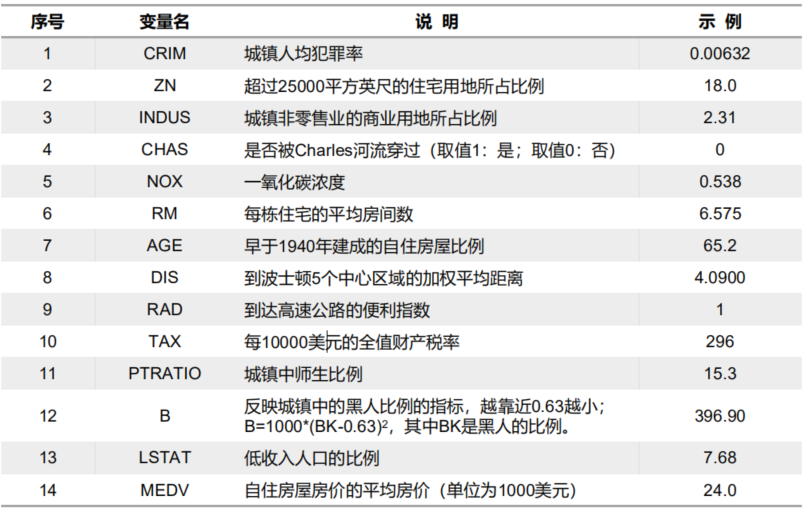

##### 通过直观的分析，一般我们的住房价格可能与地段，面积，交通有关，即上面属性中提到的：ZN（住宅用地比例）,RM（平均房间数）,DIS(到就业中心的加权平均距离),RAD(据高速公路的便利指数).因此，可以绘制图形观测，这几个几个属性与房价的关系

Text(0, 0.5, '住房价格')

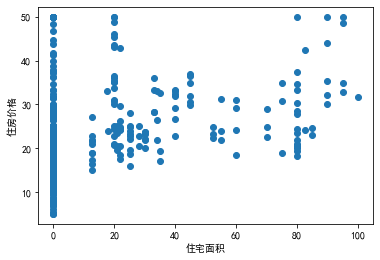

In [4]:
# 绘制价格与住宅面积的散点图
plt.scatter(boston_hoursing_show.ZN,boston_hoursing_show.Price)
plt.xlabel("住宅面积")
plt.ylabel("住房价格")

Text(0, 0.5, '住房价格')

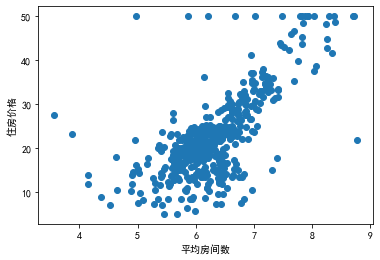

In [5]:
# 绘制价格与平均房间数的散点图
plt.scatter(boston_hoursing_show.RM,boston_hoursing_show.Price)
plt.xlabel("平均房间数")
plt.ylabel("住房价格")

Text(0, 0.5, '住房价格')

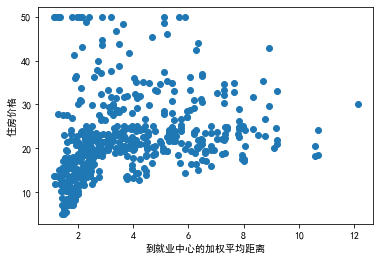

In [6]:
# 绘制价格与到就业中心的加权平均距离的散点图
plt.scatter(boston_hoursing_show.DIS,boston_hoursing_show.Price)
plt.xlabel("到就业中心的加权平均距离")
plt.ylabel("住房价格")

Text(0, 0.5, '住房价格')

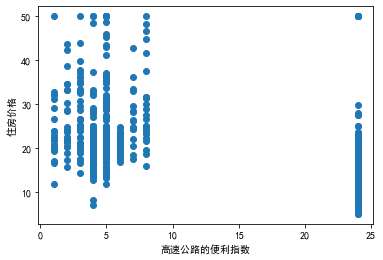

In [7]:
# 绘制价格与高速公路的便利指数的散点图
plt.scatter(boston_hoursing_show.RAD,boston_hoursing_show.Price)
plt.xlabel("高速公路的便利指数")
plt.ylabel("住房价格")

Text(0, 0.5, '住房价格')

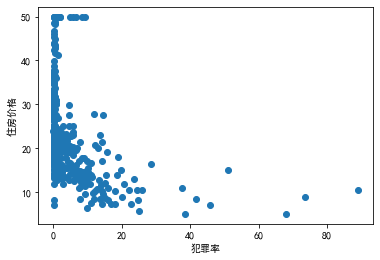

In [8]:
# 绘制价格与犯罪率的散点图
plt.scatter(boston_hoursing_show.CRIM,boston_hoursing_show.Price)
plt.xlabel("犯罪率")
plt.ylabel("住房价格")

###### 从以上的数据可以观测出，房价和多个指标相关。接下来需要对数据进行预处理

In [9]:
# 异常值处理：通过观测有16个目标值值为50.0的数据点需要被移除
i_=[]
for i in range(len(boston_target)):
    if boston_target[i] == 50:
        i_.append(i)#存储房价等于50 的异常值下标
        
boston_feature = np.delete(boston_feature,i_,axis=0)#删除房价异常值数据
boston_target = np.delete(boston_target,i_,axis=0)#删除异常值
print("当前数据集中的特征数据的行数以及列数为：",np.shape(boston_feature))
print("当前数据集中的标签数据的行数为：",np.shape(boston_target))

当前数据集中的特征数据的行数以及列数为： (490, 13)
当前数据集中的标签数据的行数为： (490,)


###### 接下来将采用不同的方法，对数据进行测试和训练，已达到预测的目的

In [10]:
# 将数据划分为测试机和训练集,测试样本30%
from sklearn.model_selection import train_test_split
boston_feature_train,boston_feature_test,boston_target_train,boston_target_test=train_test_split(boston_feature,
                                                                                                 boston_target,
                                                                                                 random_state=0,
                                                                                                 test_size=0.30)

- 在python3.6中sklearn已弃用train_test_split，不这样导入直接用将导致报错

- 接下来将从对数据采用几种常用的回归方法，对数据进行分析，最后对几种回归分析经行比较和分析
1. 多元回归
3. 逻辑回归

In [11]:
# 1.导入线性回归
from sklearn.linear_model import LinearRegression

# 2.创建模型：线性回归
boston_model1 = LinearRegression()

# 3.训练模型
boston_model1.fit(boston_feature_train,boston_target_train)

# 训练后的截距
a1 = boston_model1.intercept_
# 训练后的回归系数
b1 = boston_model1.coef_
print('最佳拟合线：截距a = ',a1,'\n回归系数b = ',b1)

最佳拟合线：截距a =  35.07476409245862 
回归系数b =  [-1.22653827e-01  4.36639727e-02 -7.66646556e-02  1.06528533e+00
 -1.16910380e+01  3.08438692e+00 -3.25073488e-02 -1.34949792e+00
  2.37058557e-01 -1.11461913e-02 -7.38141026e-01  7.13720276e-03
 -3.62658016e-01]


In [12]:
# 训练数据的预测值
boston_feature_predict1=boston_model1.predict(boston_feature_train)
for i, prediction in enumerate(boston_feature_predict1):
    print('Predicted: %s, Target: %s' % (prediction, boston_target_test[i]))

Predicted: 32.27821752077784, Target: 24.3
Predicted: 25.967200108274653, Target: 32.5
Predicted: 22.858477407550424, Target: 17.8
Predicted: 30.593432911792583, Target: 19.5
Predicted: 18.105495955533343, Target: 19.9
Predicted: 25.64350006745552, Target: 20.0
Predicted: 18.147878284685646, Target: 21.9
Predicted: 22.843173820193, Target: 8.4
Predicted: 29.30837497716708, Target: 19.6
Predicted: 11.843983580323169, Target: 13.3
Predicted: 18.745830810154445, Target: 48.8
Predicted: 19.464075886124583, Target: 27.5
Predicted: 13.410723512755055, Target: 27.9
Predicted: 32.080056118775985, Target: 27.5
Predicted: 31.50267787884217, Target: 46.0
Predicted: 21.693513984104232, Target: 31.0
Predicted: 23.26919243265308, Target: 13.5
Predicted: 29.299432964839212, Target: 23.8
Predicted: 26.90137533401356, Target: 24.5
Predicted: 20.086119718593675, Target: 20.6
Predicted: 23.68837058648122, Target: 43.1
Predicted: 17.882279684617934, Target: 17.1
Predicted: 24.356733077768162, Target: 41.3

IndexError: index 147 is out of bounds for axis 0 with size 147

In [13]:
"""
使用 score 方法可以计算 R方
R方的范围为 [0, 1]
R方越接近 1，说明拟合程度越好
"""
# 模型评估
accurucy_1=boston_model1.score(boston_feature_test , boston_target_test)
print("模型的准确性为：",accurucy_1)

模型的准确性为： 0.745594265878896


- 以上可以知道，该数据集采用线性回归分析中的准确度为：0.745594265878896
- 根据上面的数据，可以写出多元回归的方程为：y=35.07+(-1.23)x1+4.37x2+(-7.67)x3+...+7.14x12+(-3.63)x13
- 其中还需要排除回归分析为负数的情况，方程进阶为：y=35.07+4.37x2+(-7.67)x3+...+7.14x12
- 接下来对数据集进行预测与模型测评。同样使用predict与score函数来获取所需要的预测值与得分。

In [14]:
# 逻辑回归
# 1.导入逻辑回归
from sklearn.linear_model import LogisticRegression

# 2.创建模型：逻辑回归
boston_model2 = LogisticRegression()

# 3.数据处理
for i in range(len(boston_feature_train)):
    print("boston_feature_train:",i,"boston_feature_train[i]:",boston_target_train[i])
    for j in range(len(boston_feature_train[i])):
        boston_feature_train[i][j]=int(boston_feature_train[i][j]*1000)
for i in range(len(boston_target_train)):
    print("boston_target_train:",i,"boston_target_train[i]:",boston_target_train[i])
    boston_target_train[i]=int(boston_target_train[i]*1000)
    
# 4.模型训练
boston_model2.fit(boston_feature_train,boston_target_train)

# 评估模型的准确率
accurucy_2=boston_model2.score(boston_feature_test,boston_target_test)
print("模型的准确性为：",accurucy_2)

boston_feature_train: 0 boston_feature_train[i]: 36.1
boston_feature_train: 1 boston_feature_train[i]: 28.7
boston_feature_train: 2 boston_feature_train[i]: 33.0
boston_feature_train: 3 boston_feature_train[i]: 31.5
boston_feature_train: 4 boston_feature_train[i]: 20.1
boston_feature_train: 5 boston_feature_train[i]: 23.9
boston_feature_train: 6 boston_feature_train[i]: 19.9
boston_feature_train: 7 boston_feature_train[i]: 20.3
boston_feature_train: 8 boston_feature_train[i]: 30.5
boston_feature_train: 9 boston_feature_train[i]: 12.0
boston_feature_train: 10 boston_feature_train[i]: 19.5
boston_feature_train: 11 boston_feature_train[i]: 20.6
boston_feature_train: 12 boston_feature_train[i]: 10.9
boston_feature_train: 13 boston_feature_train[i]: 30.1
boston_feature_train: 14 boston_feature_train[i]: 30.3
boston_feature_train: 15 boston_feature_train[i]: 21.2
boston_feature_train: 16 boston_feature_train[i]: 20.5
boston_feature_train: 17 boston_feature_train[i]: 26.7
boston_feature_train

boston_target_train: 87 boston_target_train[i]: 25.0
boston_target_train: 88 boston_target_train[i]: 25.0
boston_target_train: 89 boston_target_train[i]: 13.5
boston_target_train: 90 boston_target_train[i]: 21.2
boston_target_train: 91 boston_target_train[i]: 38.7
boston_target_train: 92 boston_target_train[i]: 26.6
boston_target_train: 93 boston_target_train[i]: 16.0
boston_target_train: 94 boston_target_train[i]: 19.1
boston_target_train: 95 boston_target_train[i]: 24.4
boston_target_train: 96 boston_target_train[i]: 24.6
boston_target_train: 97 boston_target_train[i]: 32.4
boston_target_train: 98 boston_target_train[i]: 22.6
boston_target_train: 99 boston_target_train[i]: 18.3
boston_target_train: 100 boston_target_train[i]: 14.3
boston_target_train: 101 boston_target_train[i]: 20.6
boston_target_train: 102 boston_target_train[i]: 19.8
boston_target_train: 103 boston_target_train[i]: 7.2
boston_target_train: 104 boston_target_train[i]: 37.6
boston_target_train: 105 boston_target_tra

F:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


ValueError: Classification metrics can't handle a mix of continuous and multiclass targets